$$ FINAL\space PROJECT $$
---      ---
$$ ANALYSIS\space of\space DIFFERENT\space  IMAGE\space  ENHANCEMENT\space  TECHNIQUES\space FOR\space MRI-MODALITY $$
--

$$ GROUP-1$$
--
$$OLUWASEUN\space AJOSE\space-0676569$$ 
$$MICHAEL\space AGADAH\space-0682067$$
$$SHASHI\space VARDHA\space SAMIDI \space-0682803$$
$$SHYAM\space JOSHI\space-0682020$$


$$ Introduction $$
----
Image enhancement is basically improving the interpretability or perception of information in images for human viewers and providing better input for other automated image processing techniques. The principal objective of image-enhancement is to modify attributes of an image to make it more suitable for a given task and a specific observer [2]. 

During this process, one or more attributes of the image are modified. The choice of attributes and the way they are modified are specific to a given task. Moreover, observer specific factors, such as the human visual system and the observer's experience, will introduce a great deal of subjectivity into the choice of image enhancement methods. Image enhancement is applied in every field where images are ought to be understood and analyzed. For example, medical image analysis, analysis of images from satellites etc., [2]. 


Image enhancement simply means, transforming an image f into image g using T. (Where T is the transformation. The values of pixels in images f and g are denoted by r and s, respectively. As said, the pixel values r and s are related by the expression [5] .                                  
$$ s = T(r) $$


Magnetic Resonance Imaging (MRI), an image of a cross-section of tissue can be made by producing a well-calibrated magnetic field gradient across the tissue so that a certain value of magnetic field can be associated with a given location in the tissue. Since the proton signal frequency is proportional to that magnetic field, a given proton signal frequency can be assigned to a location in the tissue. This provides the information to map the tissue in terms of the protons present there. Since the proton density varies with the type of tissue, a certain amount of contrast is achieved to image the organs and other tissue variations in the subject tissue [11]. 


$$ In\space this\space project\space we\space are\space focusing\space on\space differnt\space enhancement\space techniques\space and\space finding\space out\space which\space is\space more\space efficient.$$





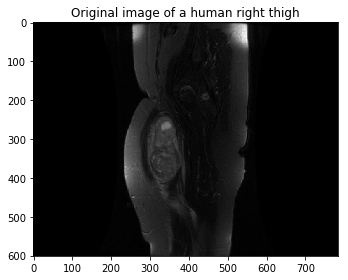

In [1]:
%matplotlib inline
from skimage import novice, data, io, exposure # provides a simple image manipulation interface for beginners. It allows for easy loading, manipulating, and saving of image files.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import dicom
RefDs = dicom.read_file('im023.dcm') #we are using dicom to read MRI file
mrithigh = novice.open('im023.png') #we are using novice to open MRI file
plt.title('Original image of a human right thigh')
mrithigh.show()


The anatomy image of Righ thigh is downloaded from web site [13].

Even though we can see this image its hard to identify gray and white matter in the image. With out clear information we cann't study any image. so, we are using image enchancements.

In [2]:
print('The image is '+str(RefDs.Rows)+'x'+str(RefDs.Columns)+' pixels')
print('The image was encoded with '+str(RefDs.BitsStored)+' bits ')
print('The medical image modality is '+str(RefDs.Modality))
print('The anatomy imaged is '+str(RefDs.BodyPartExamined)) 

The image is 512x512 pixels
The image was encoded with 9 bits 
The medical image modality is MR
The anatomy imaged is EXTREMITY


We are using Dicom data to find out some of the attributes that we will be using in our project.

Original (9-bit encoding) the range is: 255


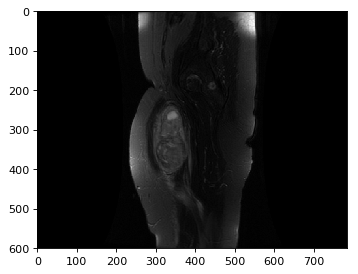

In [3]:
mrithigharray = mpimg.imread('im023.png','True') # converting image data to floating points and opening it
print('Original (9-bit encoding) the range is: '+str(np.max(mrithigharray))) 
fig=plt.figure(figsize=(5,5), dpi= 80, facecolor='w', edgecolor='k')
implot=plt.imshow(mrithigharray)


The dtype there - float256. Matplotlib has rescaled the 9 bit data from each channel to floating point data between 0.0 and 1.0. 

we are trying to change pixel intensity by coverting data to floats and forming image again. 

BUT There is no change in image

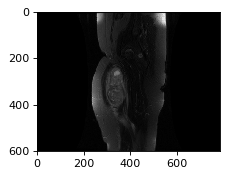

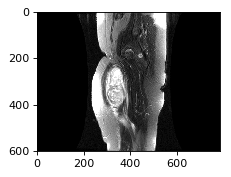

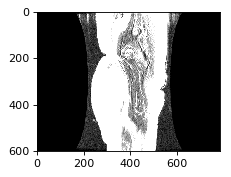

In [4]:
Jm=exposure.rescale_intensity(mrithigharray,in_range=(0, pow(2,8)-1))# converting image into floats
Km=exposure.rescale_intensity(mrithigharray,in_range=(0, pow(2,6)-1))# converting image into floats
Lm=exposure.rescale_intensity(mrithigharray,in_range=(0, pow(2,4)-1)) # converting image into floats
fig=plt.figure(figsize=(10,10), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(131)
plt.imshow(Jm)
plt.show()
fig=plt.figure(figsize=(10,10), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(132)
plt.imshow(Km)
plt.show()
fig=plt.figure(figsize=(10,10), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(133)
plt.imshow(Lm)
plt.show()

The two-argument form pow(base, power) is equivalent to using the power operator: base^power.
For int and long int operands, the result has the same type as the operands (after coercion) unless the second argument is negative; in that case, all arguments are converted to float and a float result is delivered.

As we are converting image into float we are using "pow" to vary intensity and exposure of the image 

Even though we try to imcrease the power, intensity the contrast of the image is increasing but we are lossing information in the image.

This is not a good technique

$$ Histogram\space Equalizer $$

The histogram equalization algorithm has been a conventional image enhancement algorithm for its simplicity and efficiency. It adjusts the gray level of an image according to the probability distribution function of the image and enlarges the dynamic range of the gray distribution to improve visual effects of the image[3].

Histogram equalization normally improves the contrast of the image. Histogram equalization will provide a transformation function which maps the input pixels in brighter region to output pixels in full region[3].


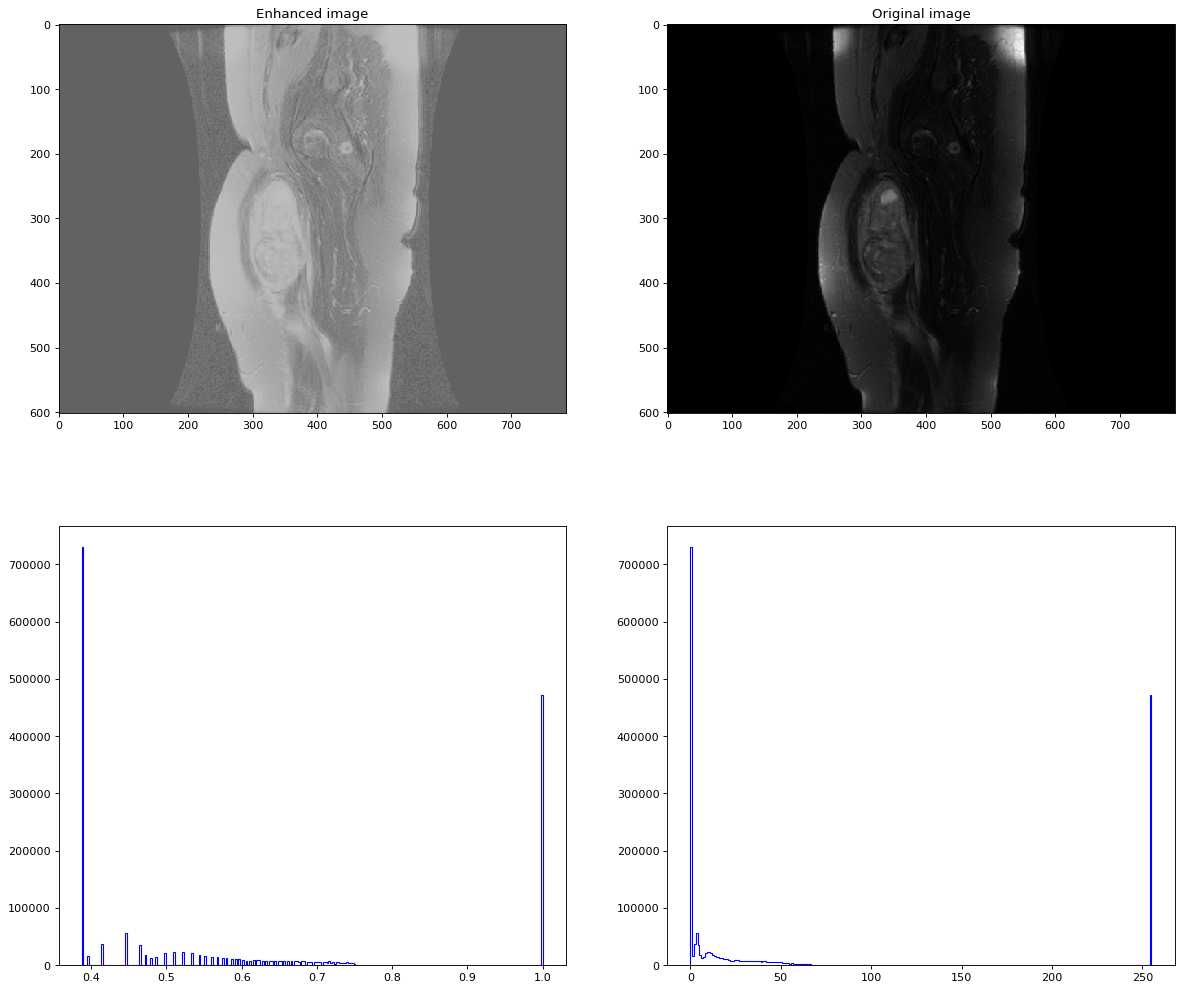

In [5]:
img_eq = exposure.equalize_hist(mrithigharray) # applying histogram equalize technique
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(221)
plt.imshow(img_eq)
plt.title('Enhanced image')
plt.subplot(222)
plt.imshow(mrithigharray)
plt.title('Original image')
plt.subplot(223)
ht=plt.hist(img_eq.ravel(), bins=256, histtype='step', color='blue')
plt.subplot(224)
ht=plt.hist(mrithigharray.ravel(), bins=256, histtype='step', color='blue')

 The conventional histogram equalization algorithm is easy causing information loss. 
 
 It increased the contrast level but but no use.  even in the histogram graph we can see no continuity.

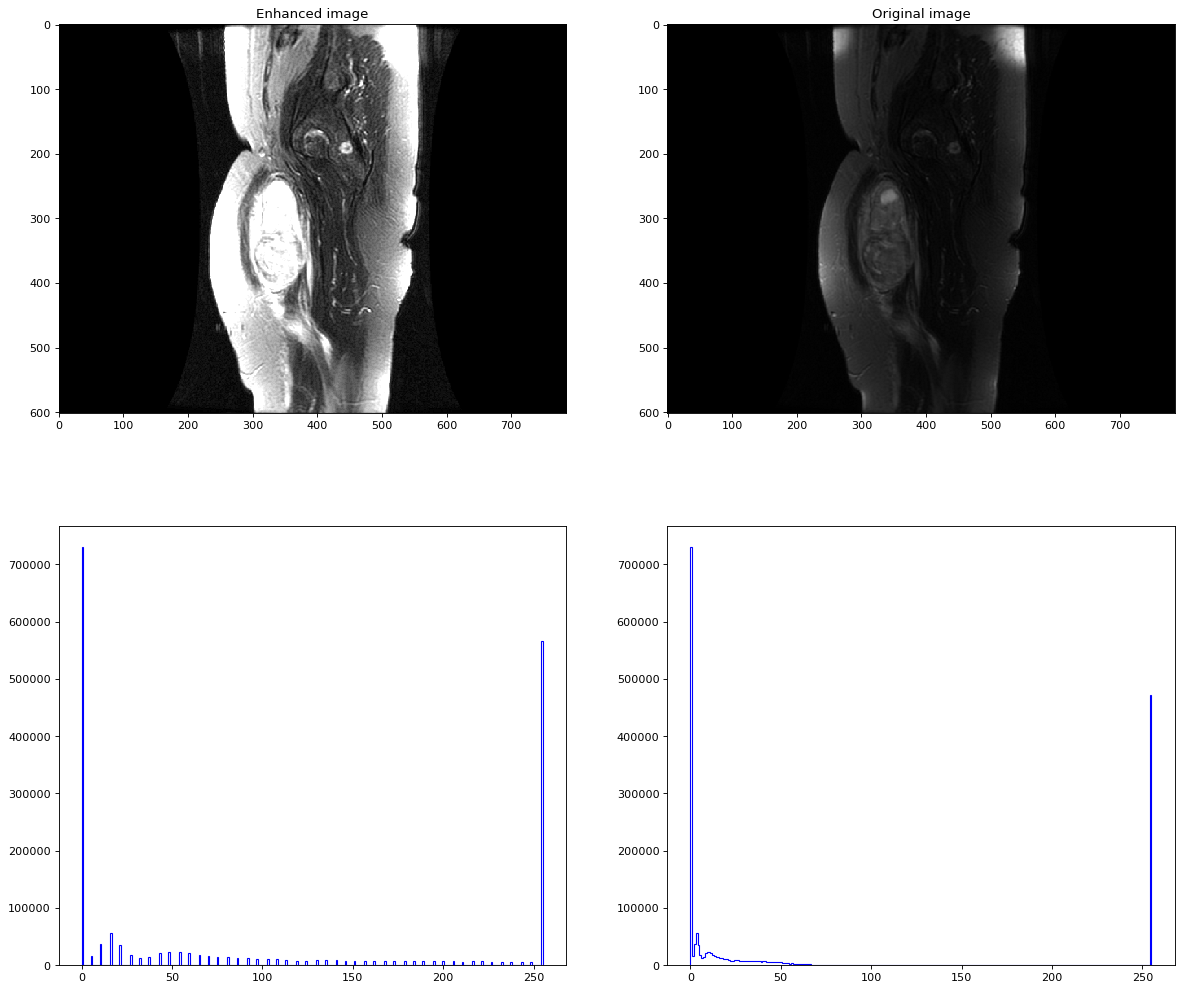

In [6]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
p2, p98 = np.percentile(mrithigharray, (5, 70))  # using percentile to find agerage and rescale.
img_eq2 = exposure.rescale_intensity(mrithigharray, in_range=(p2, p98))

plt.subplot(221)
plt.imshow(img_eq2)
plt.title('Enhanced image')
plt.subplot(222)
plt.imshow(mrithigharray)
plt.title('Original image')
plt.subplot(223)
ht=plt.hist(img_eq2.ravel(), bins=256, histtype='step', color='blue')
plt.subplot(224)
ht=plt.hist(mrithigharray.ravel(), bins=256, histtype='step', color='blue')

Now we are using numpy.percentile, it can Compute the qth percentile of the data along the specified axis.

In this technique we are finding percentile or aver of pixel intensity from p2-p98 keeping the percentile as varible increasing contrast of the image.

Even though image looks better compared to previouis image techniques there is lost of information loss in this technique.

This is not a good technique.


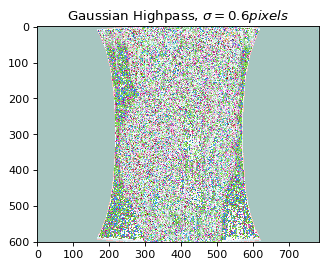

In [7]:

import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from PIL import Image


fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
def plot(data, title):
    plot.i += 1
    plt.subplot(2,2,plot.i)
    plt.imshow(data)
    plt.gray()
    plt.title(title)
plot.i = 0
#print(+lowpass)
im = Image.open('im023.png')
data = np.array(im, dtype=float)
#print(+lowpass)
lowpass = ndimage.gaussian_filter(data,0.6)
gauss_highpass =data - lowpass
plot(gauss_highpass, 'Gaussian Highpass, $\sigma = 0.6 pixels$' )
plt.show()

$$Gaussian\space High\space Pass\space Filter$$

   A high-pass filter can be used to make an image appear sharper. These filters emphasize fine details in the image – exactly the opposite of the low-pass filter. High-pass filtering works in exactly the same way as low-pass filtering; it just uses a different convolution kernel. Unfortunately, while low-pass filtering smooths out noise, high-pass filtering does just the opposite: it amplifies noise. You can get away with this if the original image is not too noisy; otherwise the noise will overwhelm the image. High-pass filtering can also cause small, faint details to be greatly exaggerated. An over-processed image will look grainy and unnatural, and point sources will have dark donuts around them. So while high-pass filtering can often improve an image by sharpening detail, overdoing it can actually degrade the image quality significantly [14].

The Gaussian smoothing operator is a 2-D convolution operator that is used to blur images and remove detail and noise. In this sense it is similar to the mean filter, but it uses a different kernel that represents the shape of a Gaussian (bell-shaped) hump [14]. 

 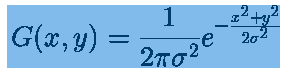

(601L, 785L, 4L)


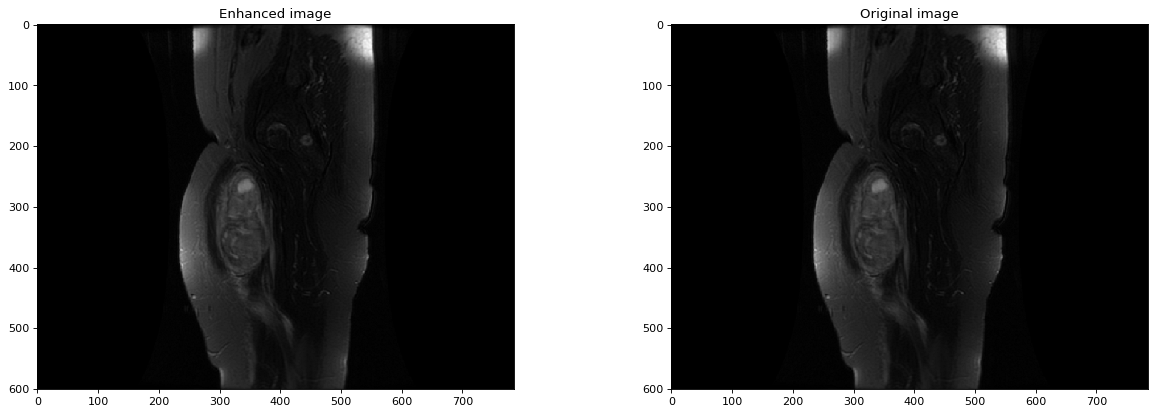

In [8]:

fig=plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.color import rgb2gray 
img = io.imread('im023.png')

print img.shape

import skimage.io as io
from skimage.color import rgb2gray 
img = io.imread('im023.png')
img_grayscale = rgb2gray(img)


plt.subplot(221)
plt.imshow(img_grayscale)
plt.title('Enhanced image')
plt.subplot(222)
plt.imshow(img)
plt.title('Original image')

show_grayscale = io.imshow(img_grayscale)
io.show()

$$ RGB2GRAY $$
A pixel color in an image is a combination of three colors Red, Green, and Blue (RGB). ... The luminance of a pixel value of a grayscale image ranges from 0 to 255. The conversion of a color image into a grayscale image is converting the RGB values (24 bit) into grayscale value (8 bit).

We are using black and white image so after applying gray scale also it did effect much.

$$ Adaptive\space  Histogram $$

We use adaptive histogram-based algorithm in which the information entropy remains the same. The algorithm introduces parameter in the gray level mapping formula, and takes the information entropy as the target function to adaptively adjust the spacing of two adjacent gray levels in the new histogram. So, it avoids excessive gray pixel merger and excessive bright local areas of the image. Experiments show that the improved algorithm may effectively improve visual effects under the premise of the same information entropy. It is useful in CT image processing [3].

C:\Users\folar\Anaconda2\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


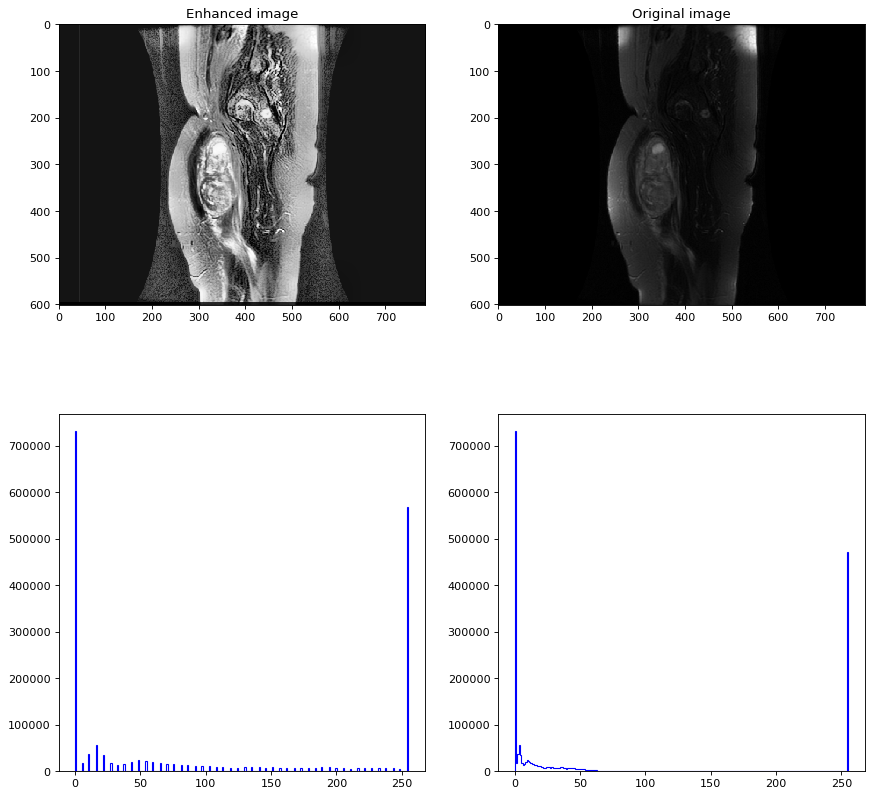

In [9]:
#Appliying adaptive histogram, the most efficient image enhancement technique for this imaging modality

img_adapteq = exposure.equalize_adapthist(mrithigharray, clip_limit=0.08)
fig=plt.figure(figsize=(13, 13), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(221)
plt.imshow(img_adapteq)
plt.title('Enhanced image')
plt.subplot(222)
plt.imshow(mrithigharray)
plt.title('Original image')
plt.subplot(223)
ht=plt.hist(img_eq2.ravel(), bins=256, histtype='step', color='blue')
plt.subplot(224)
ht=plt.hist(mrithigharray.ravel(), bins=256, histtype='step', color='blue')

## Summary

This project highlights various image enhancement techniques which can be used particularly for medical image enhancement. Results obtained, both in terms of subjective and objective shows the superiority of Adaptive Histogram Equalization (AHE). 


Bibliographic 
-----
[1]- Tingbiao Chen, Liangzheng Xia, “Digital image processing”, Beijing: Posts & Telecommunications Press, 1994. 

[2]- Pooja Mishra, Mr. KhomLal Sinha, “Different Approaches of Image Enhancement”, International Journal of Research in Advent Technology, Vol.2, No.8, August2014

[3]- Pizer, Stephen M., et al. "Adaptive histogram equalization and its variations." Computer vision, graphics, and image processing 39.3 (1987): 355-368.

[4]- Pizer, S.M., Amburn, E.P., Austin, J.D., Cromartie, R., Geselowitz, A., Greer, T., ter Haar Romeny, B., Zimmerman, J.B. and Zuiderveld, K., 1987. Adaptive histogram equalization and its variations. Computer vision, graphics, and image processing, 39(3), pp.355-368.

[5]- MLA- Maini, Raman, and Himanshu Aggarwal. "A comprehensive review of image enhancement techniques." arXiv preprint arXiv:1003.4053 (2010).

[6]- Harvard- Maini, R. and Aggarwal, H., 2010. A comprehensive review of image enhancement techniques. arXiv preprint arXiv:1003.4053.

[7]- Catani M, Thiebaut de Schotten M. A diffusion tensor imaging trac-tography atlas for virtual in vivo dissections. Cortex Sept 2008;44:1105–1132.

[8]- Jeurissen B, Leemans A, Tournier JD, Jones DK, Sijbers J. Investi-gating the prevalence of complex fiber configurations in white matter tissue with diffusion MRI. Hum Brain Mapp 2013;34:2747–2766.

[9]- Reijmer YD, Leemans A, Heringa SM, Wielaard I, Jeurissen B, Koek H, Biessels GJ. Improved sensitivity to cerebral white matter abnor-malities in Alzheimer’s disease with spherical deconvolution based tractography. PLoS One 2012;7:e44074.

[10]- Babcock, Libby Brateman, Jeffrey C. Weinreb, and Sherye D. Horner. "Edge artifacts in MR images: chemical shift effect." J Comput Assist Tornogr 9.2 (1985).

[11]- Babcock, L.B., Weinreb, J.C. and Horner, S.D., 1985. Edge artifacts in MR images: chemical shift effect. J Comput Assist Tornogr, 9(2).

[12]- Paul T. Callaghan, 1993. Principles of nuclear magnetic resonance microscopy. Oxford University Press on Demand.

[13]- http://www.cancerimagingarchive.net/

[14]- Im, S. K., Park, H. M., Kim, Y. W., Han, S. C., Kim, S. W., Kang, C. H., & Chung, C. K. (2001). An biometric identification system by extracting hand vein patterns. Journal-Korean Physical Society, 38(3), 268-272.


